In [2]:
import numpy
import xarray
import matplotlib
import matplotlib.pyplot as mp
import datetime
import matplotlib.colors
import scipy.stats
import itertools
import string
import matplotlib.patches
import pandas
import glob
import netCDF4
import matplotlib.dates
import matplotlib.gridspec

import matplotlib.ticker
import cartopy.mpl.gridliner #import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import mpl_toolkits
import cartopy

DEGREE_SIGN = u'\u00B0'
mp.rcParams.update({'mathtext.default': 'regular'})

% matplotlib inline

In [3]:
run_info = 'FMAASO'
skip_time=0

In [4]:
geo_em_ncfile = xarray.open_dataset('/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/geo_em.d01_amazon_50km.nc')
HGT_M = geo_em_ncfile.variables['HGT_M'].data[0,:,:]

# import FMAASO 400 data

In [5]:
root_dir = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/400/ens_mean_wrfout_files'
file_list = glob.glob(root_dir+'/'+'wrfout*.nc')
ds_list = [netCDF4.Dataset(file) for file in file_list]

In [6]:
cont_mfds = xarray.open_mfdataset(root_dir + '/' + 'wrfout*.nc')

In [7]:
ptot_400 = numpy.load('DATA_ptot_400.npy')

wa_400 = numpy.load('DATA_wa_400.npy')

ua_400 = numpy.load('DATA_ua_400.npy')

geopot_400 = numpy.load('DATA_geopot_400.npy')

In [8]:
rainc_400 = cont_mfds['RAINC']
rainnc_400 = cont_mfds['RAINNC']
qvapor_400 = cont_mfds['QVAPOR']

In [9]:
time = cont_mfds['Times'].values
xlat = cont_mfds['XLAT'].values[0,:,:]
xlong = cont_mfds['XLONG'].values[0,:,:]
landmask = cont_mfds['LANDMASK'].values[0,:,:]
landmask_midpoints = landmask[1:,1:]

# import FMAASO 1000 data

In [10]:
root_dir = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/1000/ens_mean_wrfout_files'
file_list = glob.glob(root_dir+'/'+'wrfout*.nc')
ds_list = [netCDF4.Dataset(file) for file in file_list]

In [11]:
phys_mfds = xarray.open_mfdataset(root_dir + '/' + 'wrfout*.nc')

In [12]:
ptot_400 = numpy.load('DATA_ptot_400.npy')

wa_1000 = numpy.load('DATA_wa_1000.npy')

ua_1000 = numpy.load('DATA_ua_1000.npy')

geopot_1000 = numpy.load('DATA_geopot_1000.npy')

In [13]:
rainc_1000 = phys_mfds['RAINC']
rainnc_1000 = phys_mfds['RAINNC']
qvapor_1000 = phys_mfds['QVAPOR']

# get time stamps

In [14]:
time_datetimes = pandas.to_datetime([i.decode('utf-8') for i in time], format = '%Y-%m-%d_%H:%M:%S')

In [15]:
lat_hi = 10.
lat_lo = -10.
# subset between lat_hi and lat_lo
lat_indices = (xlat<=lat_hi)&(xlat>=lat_lo)

# qvapor diffs

In [16]:
qvapor_diffs = qvapor_1000 - qvapor_400

In [17]:
qvapor_diffs_lat_subset = qvapor_diffs[:,:,lat_indices[:,0],:]
qvapor_400_lat_subset = qvapor_400[:,:,lat_indices[:,0],:]

In [18]:
qvapor_diffs_lat_mean = numpy.nanmean(qvapor_diffs_lat_subset, axis=2)
qvapor_400_lat_mean = numpy.nanmean(qvapor_400_lat_subset, axis=2)

# ptot diffs

In [19]:
ptot_400_lat_subset = ptot_400[:,:,lat_indices[:,0],:]
ptot_400_lat_mean = numpy.nanmean(ptot_400_lat_subset, axis=2)
ptot_400_lat_time_mean = numpy.nanmean(ptot_400_lat_mean, axis=0)

# raintot diffs

In [20]:
raintot_400 = rainc_400+rainnc_400
raintot_1000 = rainc_1000+rainnc_1000

raintot_diffs = raintot_1000-raintot_400

raintot_diffs_lat_subset = raintot_diffs[:,lat_indices[:,0],:]
raintot_400_lat_subset = raintot_400[:,lat_indices[:,0],:]

In [21]:
raintot_diffs_lat_subset.shape

(241, 45, 289)

In [22]:
raintot_hourly_diffs_lat_subset = numpy.zeros((raintot_diffs_lat_subset.shape))*numpy.nan
raintot_hourly_diffs_lat_subset[1:,:,:] = numpy.diff(raintot_diffs_lat_subset, axis=0)
raintot_hourly_diffs_lat_mean = numpy.nanmean(raintot_hourly_diffs_lat_subset, axis=1)

/export/home/blangenb/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until


# geopot 400

In [23]:
geopot_400_lat_subset = geopot_400[:,:,lat_indices[:,0],:]

In [24]:
geopot_400_lat_subset.shape

(241, 29, 45, 289)

In [25]:
geopot_400_lat_mean = numpy.nanmean(geopot_400_lat_subset, axis=2)

In [26]:
geopot_400_lat_time_mean = numpy.nanmean(geopot_400_lat_mean, axis=0)

# open mse from npy files

# ua differences

In [27]:
ua_diffs = ua_1000-ua_400

In [28]:
ua_diffs_lat_subset = ua_diffs[:,:,lat_indices[:,0],:]
ua_400_lat_subset = ua_400[:,:,lat_indices[:,0],:]

In [29]:
ua_diffs_lat_mean = numpy.nanmean(ua_diffs_lat_subset, axis=2)
ua_400_lat_mean = numpy.nanmean(ua_400_lat_subset, axis=2)

# wa differences

In [30]:
wa_diffs = wa_1000-wa_400

In [31]:
wa_diffs_lat_subset = wa_diffs[:,:,lat_indices[:,0],:]
wa_400_lat_subset = wa_400[:,:,lat_indices[:,0],:]

In [32]:
wa_diffs_lat_mean = numpy.nanmean(wa_diffs_lat_subset, axis=2)
wa_400_lat_mean = numpy.nanmean(wa_400_lat_subset, axis=2)

# PBLH differences

# Hövmoller

# pick out based on geopotential height (1-3km)

# pick out qvapor based on pressure

In [33]:
qvapor_diffs_lat_mean_850_700hPa = numpy.copy(qvapor_diffs_lat_mean)
qvapor_diffs_lat_mean_850_700hPa[(ptot_400_lat_mean>90000.)|(ptot_400_lat_mean<70000.)] = numpy.nan
qvapor_diffs_lat_mean_850_700hPa = numpy.nanmean(qvapor_diffs_lat_mean_850_700hPa, axis=1)

# pick out wa based on pressure

In [34]:
wa_diffs_lat_mean_700_200hPa = numpy.copy(wa_diffs_lat_mean)
#wa_diffs_lat_mean_700_200hPa[(ptot_400_lat_mean>50000.)] = numpy.nan
wa_diffs_lat_mean_700_200hPa = numpy.nanmean(wa_diffs_lat_mean_700_200hPa, axis=1)

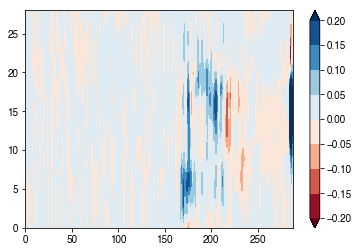

In [35]:
wa_diffs_lat_mean.shape
mp.contourf(numpy.mean(wa_diffs_lat_mean[48:72,:,:],axis=0)*86400/1000, levels=numpy.arange(-.2,.21,.05), extend='both', cmap='RdBu')
mp.colorbar()

# calculate mean wind in the layers

In [36]:
lon_left = 285.
lon_right = 315.
xlong_indices_ua_calc = (xlong[0,:]+360. >= lon_left) & (xlong[0,:]+360 <= lon_right)

In [37]:
ua_400_lat_mean_850_700hPa = numpy.copy(ua_400_lat_mean)
ua_400_lat_mean_850_700hPa[(ptot_400_lat_mean>90000.)|(ptot_400_lat_mean<70000.)] = numpy.nan
ua_400_lat_mean_850_700hPa = numpy.nanmean(ua_400_lat_mean_850_700hPa, axis=1)

In [38]:
ua_400_mean = numpy.nanmean(ua_400_lat_mean_850_700hPa[:,xlong_indices_ua_calc])

# format xticks

In [39]:
xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

# calculate Andes height

In [40]:
HGT_M_lat_subset = HGT_M[lat_indices[:,0],:]
HGT_M_lat_subset_maxvals = numpy.max(HGT_M_lat_subset, axis=0)
HGT_M_lat_subset_equator = HGT_M[round(HGT_M_lat_subset.shape[0]/2),:]
HGT_M_lat_subset_minvals = numpy.min(HGT_M_lat_subset, axis=0)
HGT_M_lat_subset_mean = numpy.mean(HGT_M_lat_subset, axis=0)
HGT_M_lat_subset_median = numpy.median(HGT_M_lat_subset, axis=0)

# plot manuscript figure

In [51]:
datetime.timedelta(hours=4)

datetime.timedelta(0, 14400)

In [56]:
time_datetimes[-1].day

11

In [ ]:
fontsize=12
fig = mp.figure(figsize=(8.5,6))

#ax1=fig.add_subplot(131)

levels=numpy.arange(-0.3,0.310,0.05)
levels_precip = numpy.arange(-0.125,0.1251,0.0125)

ax2=fig.add_subplot(121)
contour_plot = ax2.contourf(xlong[0,:]+360.,time_datetimes-datetime.timedelta(hours=4),\
                           #qvapor_diffs_lat_mean_1_3km*1000.,\
                           qvapor_diffs_lat_mean_850_700hPa*1000.,\
                           cmap='PuOr',\
                           levels=levels,\
                           extend='both')
contour_line = ax2.contour(xlong[0,:]+360.,time_datetimes-datetime.timedelta(hours=4),\
                           #qvapor_diffs_lat_mean_1_3km*1000.,\
                           qvapor_diffs_lat_mean_850_700hPa*1000.,\
                           levels=[-0.1,0.1],\
                           colors='0.1',\
                           linestyles=['--'],\
                           linewidths=[0.5])

ax2.text(s='(a) $\Delta$ moisture (900–700 hPa layer)', x=0, y=1.02,\
         fontsize=fontsize, transform=ax2.transAxes)
ax2.set_xticks([280,300,320])
ax2.set_xticklabels(xticks_format)
ax2.set_xlim(275.,325.)
ax2.set_ylim(datetime.datetime(1979,1,1,4,0,0),datetime.datetime(1979,1,10))
ax2.set_yticks(time_datetimes[[t.hour==0 and t.day<11 for t in time_datetimes]])
ax2.yaxis.set_major_formatter(matplotlib.dates.DateFormatter('%d'))
ax2.tick_params(labelsize=fontsize)

ax3 = fig.add_subplot(122)
contour_rain = ax3.contourf(xlong[0,:]+360.,time_datetimes-datetime.timedelta(hours=4),\
                           raintot_hourly_diffs_lat_mean,\
                           levels=levels_precip,\
                           cmap='BrBG', extend='both')
ax3.text(s='(b) $\Delta$ hourly precipitation', x=0, y=1.02,\
         fontsize=fontsize, transform=ax3.transAxes)
ax3.set_xticks([280,300,320])
ax3.set_xticklabels(xticks_format)
ax3.set_xlim(275.,325.)
ax3.set_ylim(datetime.datetime(1979,1,1,4,0,0),datetime.datetime(1979,1,10))
ax3.set_yticks(time_datetimes[[t.hour==0 and t.day<11 for t in time_datetimes]])
ax3.set_yticklabels([])
ax3.yaxis.set_major_formatter(matplotlib.dates.DateFormatter('%d'))
ax3.tick_params(labelsize=fontsize)

fig.tight_layout()

# ax1_pos = ax1.get_position()
ax2_pos = ax2.get_position()
ax3_pos = ax3.get_position()

cbar1_ax = fig.add_axes([ax2_pos.x0,ax2_pos.y0-0.1,ax2_pos.width,0.03])
cbar1 = mp.colorbar(contour_plot, cax=cbar1_ax, orientation='horizontal')
cbar1_ax.tick_params(labelsize=fontsize)
cbar1.set_ticks([-0.3,-0.15,0,0.15,0.3])
#cbar1_ax.axvline(cbar1_ax.get_xticks()[2],lw=0.5,c='0.1',ls='--')
#cbar1_ax.axvline(cbar1_ax.get_xticks()[4],lw=0.5,c='0.1',ls='--')
cbar1.set_label('g kg$^{\,-1}$', fontsize=fontsize)
cbar1.add_lines(contour_line, ls=':')

cbar2_ax = fig.add_axes([ax3_pos.x0,ax3_pos.y0-0.1,ax3_pos.width,0.03])
cbar2 = mp.colorbar(contour_rain, cax=cbar2_ax, orientation='horizontal')
cbar2_ax.tick_params(labelsize=fontsize)
cbar2.set_ticks([-0.1,0,0.1])
cbar2.set_label('mm hour$^{\,-1}$', fontsize=fontsize)

ax2_orog = fig.add_axes([ax2_pos.x0,ax2_pos.y0,ax2_pos.width,ax2_pos.height*0.2])
ax2_orog.axis('off')
ax2_orog.plot(xlong[0,:]+360., HGT_M_lat_subset_mean/1000., lw=1.5, ls='--', c='0.1')#, alpha=0.5)
ax2_orog.set_xlim(ax2.get_xlim())#xlong.min()+55.+360.,xlong.max()+360.)

ax3_orog = fig.add_axes([ax3_pos.x0,ax3_pos.y0,ax3_pos.width,ax3_pos.height*0.2])
ax3_orog.axis('off')
ax3_orog.plot(xlong[0,:]+360., HGT_M_lat_subset_mean/1000., lw=1.5, ls='--', c='0.1')#, alpha=0.5)
ax3_orog.set_xlim(ax2.get_xlim())

#ax1.yaxis.grid(True,linestyle='-',c='0.25',lw=0.5)
ax2.yaxis.grid(True,linestyle='-',c='0.25',lw=0.5)
ax3.yaxis.grid(True,linestyle='-',c='0.25',lw=0.5)
#ax1.xaxis.grid(True,linestyle='-',c='0.25',lw=0.5)
ax2.xaxis.grid(True,linestyle='-',c='0.25',lw=0.5)
ax3.xaxis.grid(True,linestyle='-',c='0.25',lw=0.5)

speed1 = 2.3 #6.3 # m/s
dt = 86400. # seconds
dx = dt*speed1
slope1 = dt/-dx # sec/meter
intercept1 = 10*dt
xvals1 = numpy.linspace(ax2.get_xlim()[0],ax2.get_xlim()[1],100)
xvals1_m = xvals1*50000.
yvals1 = slope1*(xvals1_m-ax2.get_xlim()[0]*50000) + intercept1
start_date = datetime.datetime(1979,1,1,0)
yvals1_datetime = [start_date + datetime.timedelta(seconds=int(t)) for t in yvals1]

speed2 = 6#-ua_400_mean #5.1 #6.3 # m/s
dt = 86400. # seconds
dx = dt*speed2
slope2 = dt/-dx # sec/meter
intercept2 = 7.*dt
xvals2 = numpy.linspace(ax2.get_xlim()[0],ax2.get_xlim()[1],100)
xvals2_m = xvals2*50000.
yvals2 = slope2*(xvals2_m-ax2.get_xlim()[0]*50000) + intercept2
start_date = datetime.datetime(1979,1,1,0)
yvals2_datetime = [start_date + datetime.timedelta(seconds=int(t)) for t in yvals2]

#ax2.plot(xvals1,yvals1_datetime,lw=0.75,ls='--',c='0.1')
ax2.plot(xvals2,yvals2_datetime,lw=0.75,ls='--',c='0.1')

plot_ratio = ax2.get_data_ratio()
ax2.set_ylabel('simulation day', fontsize=fontsize)

# slope_rotation1 = numpy.degrees(numpy.arctan(slope1/plot_ratio))
# ax2.text(s='$-\,$'+str(speed1)+' m s$^{\,-1}$',x=0.69,y=0.2,transform=ax2.transAxes,\
#          ha='center',\
#          va='center',\
#          fontsize=fontsize,\
#          rotation=slope_rotation1+4)

slope_rotation2 = numpy.degrees(numpy.arctan(slope2/plot_ratio))
ax2.text(s='$-\,$'+'{:.1f}'.format(speed2)+' m s$^{\,-1}$',x=0.7,y=0.41,transform=ax2.transAxes,\
         ha='center',\
         va='center',\
         fontsize=fontsize,\
         rotation=slope_rotation2+4)

fig.savefig('figures/manuscript_fig7_qvapor_hovmoller_with_rain_diffs.png',dpi=600,bbox_inches='tight',transparent=True)


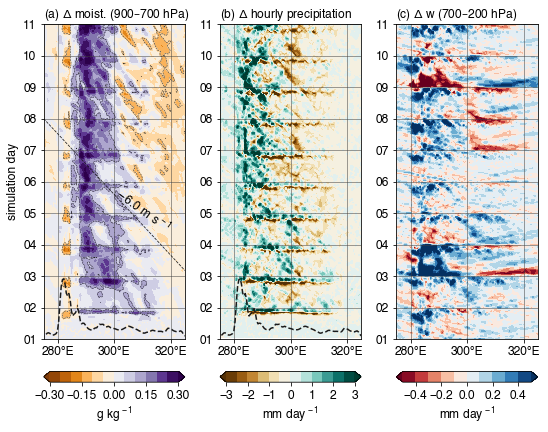

In [232]:
fontsize=12
fig = mp.figure(figsize=(7.5,5))

#ax1=fig.add_subplot(131)

levels=numpy.arange(-0.3,0.310,0.05)
levels_precip = numpy.arange(-3,3.1,0.5)
levels_wa = numpy.arange(-.5,.51,0.1)

ax1=fig.add_subplot(131)
contour_plot = ax1.contourf(xlong[0,:]+360.,time_datetimes,\
                           #qvapor_diffs_lat_mean_1_3km*1000.,\
                           qvapor_diffs_lat_mean_850_700hPa*1000.,\
                           cmap='PuOr',\
                           levels=levels,\
                           extend='both')
contour_line = ax1.contour(xlong[0,:]+360.,time_datetimes,\
                           #qvapor_diffs_lat_mean_1_3km*1000.,\
                           qvapor_diffs_lat_mean_850_700hPa*1000.,\
                           levels=[-0.1,0.1],\
                           colors='0.1',\
                           linestyles=['--'],\
                           linewidths=[0.5])

ax1.text(s='(a) $\Delta$ moist. (900–700 hPa)', x=0, y=1.02,\
         fontsize=fontsize, transform=ax1.transAxes)
ax1.set_xticks([280,300,320])
ax1.set_xticklabels(xticks_format)
ax1.set_xlim(275.,325.)
ax1.set_ylim(datetime.datetime(1979,1,1),datetime.datetime(1979,1,11))
ax1.set_yticks(time_datetimes[[t.hour==0 for t in time_datetimes]])
ax1.yaxis.set_major_formatter(matplotlib.dates.DateFormatter('%d'))
ax1.tick_params(labelsize=fontsize)





ax2 = fig.add_subplot(132)
contour_rain = ax2.contourf(xlong[0,:]+360.,time_datetimes,\
                           raintot_hourly_diffs_lat_mean*24.,\
                           levels=levels_precip,\
                           cmap='BrBG', extend='both')
ax2.text(s='(b) $\Delta$ hourly precipitation', x=0, y=1.02,\
         fontsize=fontsize, transform=ax2.transAxes)
ax2.set_xticks([280,300,320])
ax2.set_xticklabels(xticks_format)
ax2.set_xlim(275.,325.)
ax2.set_ylim(datetime.datetime(1979,1,1),datetime.datetime(1979,1,11))
ax2.set_yticks(time_datetimes[[t.hour==0 for t in time_datetimes]])
ax2.yaxis.set_major_formatter(matplotlib.dates.DateFormatter('%d'))
ax2.tick_params(labelsize=fontsize)






ax3 = fig.add_subplot(133)
contour_wa = ax3.contourf(xlong[0,:]+360.,time_datetimes,\
                           wa_diffs_lat_mean_700_200hPa*86400./1000.,\
                           levels=levels_wa,\
                           cmap='RdBu', extend='both')
ax3.text(s='(c) $\Delta$ w (700–200 hPa)', x=0, y=1.02,\
         fontsize=fontsize, transform=ax3.transAxes)
ax3.set_xticks([280,300,320])
ax3.set_xticklabels(xticks_format)
ax3.set_xlim(275.,325.)
ax3.set_ylim(datetime.datetime(1979,1,1),datetime.datetime(1979,1,11))
ax3.set_yticks(time_datetimes[[t.hour==0 for t in time_datetimes]])
ax3.yaxis.set_major_formatter(matplotlib.dates.DateFormatter('%d'))
ax3.tick_params(labelsize=fontsize)





fig.tight_layout()





# ax1_pos = ax1.get_position()
ax1_pos = ax1.get_position()
ax2_pos = ax2.get_position()
ax3_pos = ax3.get_position()

cbar1_ax = fig.add_axes([ax1_pos.x0,ax1_pos.y0-0.12,ax1_pos.width,0.03])
cbar1 = mp.colorbar(contour_plot, cax=cbar1_ax, orientation='horizontal')
cbar1_ax.tick_params(labelsize=fontsize)
cbar1.set_ticks([-0.3,-0.15,0,0.15,0.3])
cbar1.set_label('g kg$^{\,-1}$', fontsize=fontsize)

cbar2_ax = fig.add_axes([ax2_pos.x0,ax2_pos.y0-0.12,ax2_pos.width,0.03])
cbar2 = mp.colorbar(contour_rain, cax=cbar2_ax, orientation='horizontal')
cbar2_ax.tick_params(labelsize=fontsize)
cbar2.set_ticks([-3,-2,-1,0,1,2,3])
cbar2.set_label('mm day$^{\,-1}$', fontsize=fontsize)

cbar3_ax = fig.add_axes([ax3_pos.x0,ax3_pos.y0-0.12,ax3_pos.width,0.03])
cbar3 = mp.colorbar(contour_wa, cax=cbar3_ax, orientation='horizontal')
cbar3_ax.tick_params(labelsize=fontsize)
#cbar3.set_ticks([-3,-2,-1,0,1,2,3])
cbar3.set_label('mm day$^{\,-1}$', fontsize=fontsize)

ax1_orog = fig.add_axes([ax1_pos.x0,ax1_pos.y0,ax1_pos.width,ax1_pos.height*0.2])
ax1_orog.axis('off')
ax1_orog.plot(xlong[0,:]+360., HGT_M_lat_subset_mean/1000., lw=1.5, ls='--', c='0.1')#, alpha=0.5)
ax1_orog.set_xlim(ax1.get_xlim())#xlong.min()+55.+360.,xlong.max()+360.)

ax2_orog = fig.add_axes([ax2_pos.x0,ax2_pos.y0,ax2_pos.width,ax2_pos.height*0.2])
ax2_orog.axis('off')
ax2_orog.plot(xlong[0,:]+360., HGT_M_lat_subset_mean/1000., lw=1.5, ls='--', c='0.1')#, alpha=0.5)
ax2_orog.set_xlim(ax1.get_xlim())


ax1.yaxis.grid(True,linestyle='-',c='0.25',lw=0.5)
ax2.yaxis.grid(True,linestyle='-',c='0.25',lw=0.5)
ax3.yaxis.grid(True,linestyle='-',c='0.25',lw=0.5)

ax1.xaxis.grid(True,linestyle='-',c='0.25',lw=0.5)
ax2.xaxis.grid(True,linestyle='-',c='0.25',lw=0.5)
ax3.xaxis.grid(True,linestyle='-',c='0.25',lw=0.5)

speed1 = 2.3 #6.3 # m/s
dt = 86400. # seconds
dx = dt*speed1
slope1 = dt/-dx # sec/meter
intercept1 = 10*dt
xvals1 = numpy.linspace(ax1.get_xlim()[0],ax1.get_xlim()[1],100)
xvals1_m = xvals1*50000.
yvals1 = slope1*(xvals1_m-ax1.get_xlim()[0]*50000) + intercept1
start_date = datetime.datetime(1979,1,1,0)
yvals1_datetime = [start_date + datetime.timedelta(seconds=int(t)) for t in yvals1]

speed2 = 6#-ua_400_mean #5.1 #6.3 # m/s
dt = 86400. # seconds
dx = dt*speed2
slope2 = dt/-dx # sec/meter
intercept2 = 7.*dt
xvals2 = numpy.linspace(ax1.get_xlim()[0],ax1.get_xlim()[1],100)
xvals2_m = xvals2*50000.
yvals2 = slope2*(xvals2_m-ax1.get_xlim()[0]*50000) + intercept2
start_date = datetime.datetime(1979,1,1,0)
yvals2_datetime = [start_date + datetime.timedelta(seconds=int(t)) for t in yvals2]

#ax1.plot(xvals1,yvals1_datetime,lw=0.75,ls='--',c='0.1')
ax1.plot(xvals2,yvals2_datetime,lw=0.75,ls='--',c='0.1')

plot_ratio = ax1.get_data_ratio()
ax1.set_ylabel('simulation day', fontsize=fontsize)

slope_rotation2 = numpy.degrees(numpy.arctan(slope2/plot_ratio))
ax1.text(s='$-\,$'+'{:.1f}'.format(speed2)+' m s$^{\,-1}$',x=0.7,y=0.41,transform=ax1.transAxes,\
         ha='center',\
         va='center',\
         fontsize=fontsize,\
         rotation=slope_rotation2+4)

fig.savefig('manuscript_fig7alt_qvapor_hovmoller_with_rain_AND_WA_diffs.png',dpi=600,bbox_inches='tight',transparent=True)

In [63]:
cbar1.add_lines()

TypeError: add_lines() missing 1 required positional argument: 'CS'

In [ ]:
first5days_indices = [t.day in range(1,6) for t in time_datetimes]

In [ ]:
fontsize=12
fig = mp.figure(figsize=(7.5,4))

ax1=fig.add_subplot(131)

levels=numpy.arange(-1,1.1,0.125)
levels_precip = numpy.arange(-3,3.1,0.5)

contour_plot = ax1.contourf(xlong[0,:]+360.,time_datetimes,\
                           mse_diffs_lat_subset_0_1km_latmean/1000.,\
                           cmap='PuOr_r',\
                           levels=levels,\
                           extend='both')
contour_line = ax1.contour(xlong[0,:]+360.,time_datetimes,\
                           mse_diffs_lat_subset_0_1km_latmean/1000.,\
                           levels=[-0.25,0.25],\
                           colors='0.1',\
                           linestyles=['--'],\
                           linewidths=[0.5])
ax1.set_ylabel('day', fontsize=fontsize)
ax1.text(s='(a) $\Delta$ MSE in $0-1$ km', x=0, y=1.02,\
         fontsize=fontsize, transform=ax1.transAxes)

ax1.set_xticks([280,300,320])
ax1.set_xticklabels(xticks_format)
ax1.set_xlim(275.,325.)
ax1.set_ylim(datetime.datetime(1979,1,1),datetime.datetime(1979,1,6))
ax1.set_yticks(time_datetimes[first5days_indices][[t.hour==0 for t in time_datetimes[first5days_indices]]])
ax1.yaxis.set_major_formatter(matplotlib.dates.DateFormatter('%d'))
ax1.tick_params(labelsize=fontsize)




ax2=fig.add_subplot(132)
contour_plot = ax2.contourf(xlong[0,:]+360.,time_datetimes,\
                           mse_diffs_lat_subset_1_3km_latmean/1000.,\
                           cmap='PuOr_r',\
                           levels=levels,\
                           extend='both')
contour_line = ax2.contour(xlong[0,:]+360.,time_datetimes,\
                           mse_diffs_lat_subset_1_3km_latmean/1000.,\
                           levels=[-0.25,0.25],\
                           colors='0.1',\
                           linestyles=['--'],\
                           linewidths=[0.5])

ax2.text(s='(b) $\Delta$ MSE in $1-3$ km', x=0, y=1.02,\
         fontsize=fontsize, transform=ax2.transAxes)
ax2.set_xticks([280,300,320])
ax2.set_xticklabels(xticks_format)
ax2.set_xlim(275.,325.)
ax2.set_ylim(datetime.datetime(1979,1,1),datetime.datetime(1979,1,6))
ax2.set_yticks(time_datetimes[first5days_indices][[t.hour==0 for t in time_datetimes[first5days_indices]]])
ax2.yaxis.set_major_formatter(matplotlib.dates.DateFormatter('%d'))
ax2.tick_params(labelsize=fontsize)

ax3 = fig.add_subplot(133)
contour_rain = ax3.contourf(xlong[0,:]+360.,time_datetimes,\
                           raintot_hourly_diffs_lat_subset_latmean*24.,\
                           levels=levels_precip,\
                           cmap='BrBG', extend='both')
# contour_rain = ax3.pcolor(xlong[0,:]+360.,time_datetimes,\
#                            raintot_hourly_diffs_lat_subset_latmean*24.,\
#                            vmin=levels_precip.min(),vmax=levels_precip.max(),\
#                            cmap='BrBG',snap=True)
ax3.text(s='(c) $\Delta$ precipitation', x=0, y=1.02,\
         fontsize=fontsize, transform=ax3.transAxes)
ax3.set_xticks([280,300,320])
ax3.set_xticklabels(xticks_format)
ax3.set_xlim(275.,325.)
ax3.set_ylim(datetime.datetime(1979,1,1),datetime.datetime(1979,1,6))
ax3.set_yticks(time_datetimes[first5days_indices][[t.hour==0 for t in time_datetimes[first5days_indices]]])
ax3.yaxis.set_major_formatter(matplotlib.dates.DateFormatter('%d'))
ax3.tick_params(labelsize=fontsize)

fig.tight_layout()

ax1_pos = ax1.get_position()
ax2_pos = ax2.get_position()
ax3_pos = ax3.get_position()

cbar1_ax = fig.add_axes([ax1_pos.x0,ax1_pos.y0-0.12,ax2_pos.x1-ax1_pos.x0,0.03])
cbar1 = mp.colorbar(contour_plot, cax=cbar1_ax, orientation='horizontal')
cbar1_ax.tick_params(labelsize=fontsize)
cbar1.set_ticks([-1.,-.5,-0.25,0,0.25,.5,1])
cbar1_ax.axvline(cbar1_ax.get_xticks()[2],lw=0.5,c='0.1',ls='--')
cbar1_ax.axvline(cbar1_ax.get_xticks()[4],lw=0.5,c='0.1',ls='--')
cbar1.set_label('kJ kg$^{\,-1}$', fontsize=fontsize)



cbar2_ax = fig.add_axes([ax3_pos.x0,ax3_pos.y0-0.12,ax3_pos.width,0.03])
cbar2 = mp.colorbar(contour_rain, cax=cbar2_ax, orientation='horizontal')
cbar2_ax.tick_params(labelsize=fontsize)
cbar2.set_ticks([-3,-2,-1,0,1,2,3])
#cbar2_ax.axvline(cbar2_ax.get_xticks()[2],lw=0.5,c='0.1',ls='--')
#cbar2_ax.axvline(cbar2_ax.get_xticks()[4],lw=0.5,c='0.1',ls='--')
cbar2.set_label('mm day$^{\,-1}$', fontsize=fontsize)



ax1_orog = fig.add_axes([ax1_pos.x0,ax1_pos.y0,ax1_pos.width,ax1_pos.height*0.2])
ax1_orog.axis('off')
ax1_orog.plot(xlong[0,:]+360., HGT_M_lat_subset_mean/1000., lw=1.5, ls='--', c='0.1')#, alpha=0.5)
ax1_orog.set_xlim(ax1.get_xlim())

ax2_orog = fig.add_axes([ax2_pos.x0,ax2_pos.y0,ax2_pos.width,ax2_pos.height*0.2])
ax2_orog.axis('off')
ax2_orog.plot(xlong[0,:]+360., HGT_M_lat_subset_mean/1000., lw=1.5, ls='--', c='0.1')#, alpha=0.5)
ax2_orog.set_xlim(ax2.get_xlim())#xlong.min()+55.+360.,xlong.max()+360.)

ax3_orog = fig.add_axes([ax3_pos.x0,ax3_pos.y0,ax3_pos.width,ax3_pos.height*0.2])
ax3_orog.axis('off')
ax3_orog.plot(xlong[0,:]+360., HGT_M_lat_subset_mean/1000., lw=1.5, ls='--', c='0.1')#, alpha=0.5)
ax3_orog.set_xlim(ax1.get_xlim())

ax1.yaxis.grid(True,linestyle='-',c='0.25',lw=0.5)
ax2.yaxis.grid(True,linestyle='-',c='0.25',lw=0.5)
ax3.yaxis.grid(True,linestyle='-',c='0.25',lw=0.5)
ax1.xaxis.grid(True,linestyle='-',c='0.25',lw=0.5)
ax2.xaxis.grid(True,linestyle='-',c='0.25',lw=0.5)
ax3.xaxis.grid(True,linestyle='-',c='0.25',lw=0.5)

speed1 = 2.3 #6.3 # m/s
dt = 86400. # seconds
dx = dt*speed1
slope1 = dt/-dx # sec/meter
intercept1 = 10*dt
xvals1 = numpy.linspace(ax1.get_xlim()[0],ax1.get_xlim()[1],100)
xvals1_m = xvals1*50000.
yvals1 = slope1*(xvals1_m-ax2.get_xlim()[0]*50000) + intercept1
start_date = datetime.datetime(1979,1,1,0)
yvals1_datetime = [start_date + datetime.timedelta(seconds=int(t)) for t in yvals1]

speed2 = 5.1 #6.3 # m/s
dt = 86400. # seconds
dx = dt*speed2
slope2 = dt/-dx # sec/meter
intercept2 = 7.*dt
xvals2 = numpy.linspace(ax2.get_xlim()[0],ax2.get_xlim()[1],100)
xvals2_m = xvals2*50000.
yvals2 = slope2*(xvals2_m-ax2.get_xlim()[0]*50000) + intercept2
start_date = datetime.datetime(1979,1,1,0)
yvals2_datetime = [start_date + datetime.timedelta(seconds=int(t)) for t in yvals2]


# ax1.plot(xvals1,yvals1_datetime,lw=0.75,ls='--',c='0.1')
# ax1.plot(xvals2,yvals2_datetime,lw=0.75,ls='--',c='0.1')

# ax2.plot(xvals1,yvals1_datetime,lw=0.75,ls='--',c='0.1')
# ax2.plot(xvals2,yvals2_datetime,lw=0.75,ls='--',c='0.1')

# ax3.plot(xvals1,yvals1_datetime,lw=0.75,ls='--',c='0.1')
# ax3.plot(xvals2,yvals2_datetime,lw=0.75,ls='--',c='0.1')

# plot_ratio = ax2.get_data_ratio()

# slope_rotation1 = numpy.degrees(numpy.arctan(slope1/plot_ratio))
# ax2.text(s='$-\,$'+str(speed1)+' m s$^{\,-1}$',x=0.69,y=0.2,transform=ax2.transAxes,\
#          ha='center',\
#          va='center',\
#          fontsize=fontsize,\
#          rotation=slope_rotation1+4)

# slope_rotation2 = numpy.degrees(numpy.arctan(slope2/plot_ratio))
# ax2.text(s='$-\,$'+str(speed2)+' m s$^{\,-1}$',x=0.755,y=0.31,transform=ax2.transAxes,\
#          ha='center',\
#          va='center',\
#          fontsize=fontsize,\
#          rotation=slope_rotation2+4)

fig.savefig('figureXX_hovmoller_with_rain_diffs_first5days.png',dpi=600,bbox_inches='tight',transparent=True)

In [ ]:
fontsize=12
fig = mp.figure(figsize=(7.5,4))

ax1=fig.add_subplot(131)

levels=numpy.arange(-1,1.1,0.125)
levels_precip = numpy.arange(-5,5.1,0.5)

contour_plot = ax1.contourf(xlong[0,:]+360.,time_datetimes,\
                           mse_diffs_lat_subset_0_1km_latmean/1000.,\
                           cmap='PuOr_r',\
                           levels=levels,\
                           extend='both')
contour_line = ax1.contour(xlong[0,:]+360.,time_datetimes,\
                           mse_diffs_lat_subset_0_1km_latmean/1000.,\
                           levels=[-0.25,0.25],\
                           colors='0.1',\
                           linestyles=['--'],\
                           linewidths=[0.5])
ax1.set_ylabel('day', fontsize=fontsize)
ax1.text(s='(a) $\Delta$ MSE in $0-1$ km', x=0, y=1.02,\
         fontsize=fontsize, transform=ax1.transAxes)

ax1.set_xticks([280,300,320])
ax1.set_xticklabels(xticks_format)
ax1.set_xlim(275.,325.)
ax1.set_ylim(datetime.datetime(1979,1,1),datetime.datetime(1979,1,11))
ax1.set_yticks(time_datetimes[[t.hour==0 for t in time_datetimes]])
ax1.yaxis.set_major_formatter(matplotlib.dates.DateFormatter('%d'))
ax1.tick_params(labelsize=fontsize)




ax2=fig.add_subplot(132)
contour_plot = ax2.contourf(xlong[0,:]+360.,time_datetimes,\
                           mse_diffs_lat_subset_1_3km_latmean/1000.,\
                           cmap='PuOr_r',\
                           levels=levels,\
                           extend='both')
contour_line = ax2.contour(xlong[0,:]+360.,time_datetimes,\
                           mse_diffs_lat_subset_1_3km_latmean/1000.,\
                           levels=[-0.25,0.25],\
                           colors='0.1',\
                           linestyles=['--'],\
                           linewidths=[0.5])

ax2.text(s='(b) $\Delta$ MSE in $1-3$ km', x=0, y=1.02,\
         fontsize=fontsize, transform=ax2.transAxes)
ax2.set_xticks([280,300,320])
ax2.set_xticklabels(xticks_format)
ax2.set_xlim(275.,325.)
ax2.set_ylim(datetime.datetime(1979,1,1),datetime.datetime(1979,1,11))
ax2.set_yticks(time_datetimes[[t.hour==0 for t in time_datetimes]])
ax2.yaxis.set_major_formatter(matplotlib.dates.DateFormatter('%d'))
ax2.tick_params(labelsize=fontsize)

ax3 = fig.add_subplot(133)
contour_rain = ax3.contourf(xlong[0,:]+360.,time_datetimes,\
                           raintot_diffs_lat_subset_latmean,\
                           levels=levels_precip,\
                           cmap='BrBG', extend='both')
# contour_rain = ax3.pcolor(xlong[0,:]+360.,time_datetimes,\
#                            raintot_hourly_diffs_lat_subset_latmean*24.,\
#                            vmin=levels_precip.min(),vmax=levels_precip.max(),\
#                            cmap='BrBG',snap=True)
ax3.text(s='(c) $\Delta$ accum. precip.', x=0, y=1.02,\
         fontsize=fontsize, transform=ax3.transAxes)
ax3.set_xticks([280,300,320])
ax3.set_xticklabels(xticks_format)
ax3.set_xlim(275.,325.)
ax3.set_ylim(datetime.datetime(1979,1,1),datetime.datetime(1979,1,11))
ax3.set_yticks(time_datetimes[[t.hour==0 for t in time_datetimes]])
ax3.yaxis.set_major_formatter(matplotlib.dates.DateFormatter('%d'))
ax3.tick_params(labelsize=fontsize)

fig.tight_layout()

ax1_pos = ax1.get_position()
ax2_pos = ax2.get_position()
ax3_pos = ax3.get_position()

cbar1_ax = fig.add_axes([ax1_pos.x0,ax1_pos.y0-0.12,ax2_pos.x1-ax1_pos.x0,0.03])
cbar1 = mp.colorbar(contour_plot, cax=cbar1_ax, orientation='horizontal')
cbar1_ax.tick_params(labelsize=fontsize)
cbar1.set_ticks([-1.,-.5,-0.25,0,0.25,.5,1])
cbar1_ax.axvline(cbar1_ax.get_xticks()[2],lw=0.5,c='0.1',ls='--')
cbar1_ax.axvline(cbar1_ax.get_xticks()[4],lw=0.5,c='0.1',ls='--')
cbar1.set_label('kJ kg$^{\,-1}$', fontsize=fontsize)



cbar2_ax = fig.add_axes([ax3_pos.x0,ax3_pos.y0-0.12,ax3_pos.width,0.03])
cbar2 = mp.colorbar(contour_rain, cax=cbar2_ax, orientation='horizontal')
cbar2_ax.tick_params(labelsize=fontsize)
cbar2.set_ticks([-5,-2.5,0,2.5,5])
#cbar2_ax.axvline(cbar2_ax.get_xticks()[2],lw=0.5,c='0.1',ls='--')
#cbar2_ax.axvline(cbar2_ax.get_xticks()[4],lw=0.5,c='0.1',ls='--')
cbar2.set_label('mm', fontsize=fontsize)



ax1_orog = fig.add_axes([ax1_pos.x0,ax1_pos.y0,ax1_pos.width,ax1_pos.height*0.2])
ax1_orog.axis('off')
ax1_orog.plot(xlong[0,:]+360., HGT_M_lat_subset_mean/1000., lw=1.5, ls='--', c='0.1')#, alpha=0.5)
ax1_orog.set_xlim(ax1.get_xlim())

ax2_orog = fig.add_axes([ax2_pos.x0,ax2_pos.y0,ax2_pos.width,ax2_pos.height*0.2])
ax2_orog.axis('off')
ax2_orog.plot(xlong[0,:]+360., HGT_M_lat_subset_mean/1000., lw=1.5, ls='--', c='0.1')#, alpha=0.5)
ax2_orog.set_xlim(ax2.get_xlim())#xlong.min()+55.+360.,xlong.max()+360.)

ax3_orog = fig.add_axes([ax3_pos.x0,ax3_pos.y0,ax3_pos.width,ax3_pos.height*0.2])
ax3_orog.axis('off')
ax3_orog.plot(xlong[0,:]+360., HGT_M_lat_subset_mean/1000., lw=1.5, ls='--', c='0.1')#, alpha=0.5)
ax3_orog.set_xlim(ax1.get_xlim())

ax1.yaxis.grid(True,linestyle='-',c='0.25',lw=0.5)
ax2.yaxis.grid(True,linestyle='-',c='0.25',lw=0.5)
ax3.yaxis.grid(True,linestyle='-',c='0.25',lw=0.5)
ax1.xaxis.grid(True,linestyle='-',c='0.25',lw=0.5)
ax2.xaxis.grid(True,linestyle='-',c='0.25',lw=0.5)
ax3.xaxis.grid(True,linestyle='-',c='0.25',lw=0.5)

speed1 = 2.3 #6.3 # m/s
dt = 86400. # seconds
dx = dt*speed1
slope1 = dt/-dx # sec/meter
intercept1 = 10*dt
xvals1 = numpy.linspace(ax1.get_xlim()[0],ax1.get_xlim()[1],100)
xvals1_m = xvals1*50000.
yvals1 = slope1*(xvals1_m-ax2.get_xlim()[0]*50000) + intercept1
start_date = datetime.datetime(1979,1,1,0)
yvals1_datetime = [start_date + datetime.timedelta(seconds=int(t)) for t in yvals1]

speed2 = 5.1 #6.3 # m/s
dt = 86400. # seconds
dx = dt*speed2
slope2 = dt/-dx # sec/meter
intercept2 = 7.*dt
xvals2 = numpy.linspace(ax2.get_xlim()[0],ax2.get_xlim()[1],100)
xvals2_m = xvals2*50000.
yvals2 = slope2*(xvals2_m-ax2.get_xlim()[0]*50000) + intercept2
start_date = datetime.datetime(1979,1,1,0)
yvals2_datetime = [start_date + datetime.timedelta(seconds=int(t)) for t in yvals2]


ax1.plot(xvals1,yvals1_datetime,lw=0.75,ls='--',c='0.1')
ax1.plot(xvals2,yvals2_datetime,lw=0.75,ls='--',c='0.1')

ax2.plot(xvals1,yvals1_datetime,lw=0.75,ls='--',c='0.1')
ax2.plot(xvals2,yvals2_datetime,lw=0.75,ls='--',c='0.1')

ax3.plot(xvals1,yvals1_datetime,lw=0.75,ls='--',c='0.1')
ax3.plot(xvals2,yvals2_datetime,lw=0.75,ls='--',c='0.1')

plot_ratio = ax2.get_data_ratio()

slope_rotation1 = numpy.degrees(numpy.arctan(slope1/plot_ratio))
ax2.text(s='$-\,$'+str(speed1)+' m s$^{\,-1}$',x=0.69,y=0.2,transform=ax2.transAxes,\
         ha='center',\
         va='center',\
         fontsize=fontsize,\
         rotation=slope_rotation1+4)

slope_rotation2 = numpy.degrees(numpy.arctan(slope2/plot_ratio))
ax2.text(s='$-\,$'+str(speed2)+' m s$^{\,-1}$',x=0.755,y=0.31,transform=ax2.transAxes,\
         ha='center',\
         va='center',\
         fontsize=fontsize,\
         rotation=slope_rotation2+4)

fig.savefig('figureXX_hovmoller_with_SUMMED_rain_diffs.png',dpi=600,bbox_inches='tight',transparent=True)

In [ ]:
xlong_indices_280_310 = (xlong[0,:]+360. >= 280.) & (xlong[0,:]+360 <= 310.)

In [ ]:
uwind_mean = u_400_lat_mean[:,[0,1,2,3,4,5],:]
uwind_mean = numpy.nanmean(uwind_mean[:,:,xlong_indices_280_310])
print(uwind_mean)

In [ ]:
uwind_mean = u_400_lat_mean[:,[7,8,9,10,11],:]
uwind_mean = numpy.nanmean(uwind_mean[:,:,xlong_indices_280_310])
print(uwind_mean)